In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ams21.csv')
df.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,HgYmin,HgXmax,HgYmax,Intersection,Included_Center,Intersection_Area,Hg_Area,Distance,Ground_Truth,GT
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,176.115577,425.699604,203.980340,Center_left,1,844.925198,881.508223,136.120892,1,GBC
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,176.050999,425.668627,203.878841,Center_left,1,848.952861,892.193796,136.317231,1,GBC
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,175.932056,425.627609,203.722820,Center_left,1,837.705837,890.243298,136.384041,1,GBC
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,177.653896,423.709709,202.787083,Center_left,1,613.789372,763.579688,136.939795,1,GBC
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,177.582060,423.771116,202.885134,Center_left,1,611.643926,767.067283,136.847188,1,GBC


In [3]:
len(df)

18447

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18447 entries, 0 to 18446
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Frame              18447 non-null  int64  
 1   N_Person           18447 non-null  int64  
 2   Xcenter            18447 non-null  float64
 3   Ycenter            18447 non-null  float64
 4   PerXmin            18447 non-null  float64
 5   PerYmin            18447 non-null  float64
 6   PerXmax            18447 non-null  float64
 7   PerYmax            18447 non-null  float64
 8   N_Handgun          18447 non-null  int64  
 9   HgXcenter          18447 non-null  float64
 10  HgYcenter          18447 non-null  float64
 11  HgXmin             18447 non-null  float64
 12  HgYmin             18447 non-null  float64
 13  HgXmax             18447 non-null  float64
 14  HgYmax             18447 non-null  float64
 15  Intersection       18447 non-null  object 
 16  Included_Center    184

In [5]:
df.nunique()

Frame                 1933
N_Person                 5
Xcenter              14203
Ycenter              14184
PerXmin              14211
PerYmin              14208
PerXmax              14211
PerYmax              14188
N_Handgun                5
HgXcenter             7302
HgYcenter             7300
HgXmin                7304
HgYmin                7304
HgXmax                7304
HgYmax                7303
Intersection             9
Included_Center          2
Intersection_Area     8413
Hg_Area               7304
Distance             18447
Ground_Truth             2
GT                       2
dtype: int64

In [6]:
df['Ground_Truth'].value_counts()

1    17427
0     1020
Name: Ground_Truth, dtype: int64

In [7]:
df2 = pd.get_dummies(df,columns=['Intersection'])
df2.head()

,Frame,N_Person,Xcenter,Ycenter,PerXmin,PerYmin,PerXmax,PerYmax,N_Handgun,HgXcenter,...,GT,Intersection_Center_left,Intersection_Center_right,Intersection_Down_center,Intersection_Down_left,Intersection_Inside,Intersection_No_intersection,Intersection_Up_center,Intersection_Up_left,Intersection_Up_right
0,0,0,474.999451,309.582947,395.377251,156.402725,554.621651,462.763168,0,409.881988,...,GBC,1,0,0,0,0,0,0,0,0
1,1,0,474.938843,309.623566,395.161308,156.591705,554.716377,462.655426,0,409.638031,...,GBC,1,0,0,0,0,0,0,0,0
2,2,0,475.070465,309.475372,395.484291,156.138077,554.656639,462.812668,0,409.610718,...,GBC,1,0,0,0,0,0,0,0,0
3,3,0,476.837311,308.901245,399.288238,154.448364,554.386383,463.354126,0,408.519043,...,GBC,1,0,0,0,0,0,0,0,0
4,4,0,476.918640,308.815064,399.598404,154.249756,554.238876,463.380371,0,408.613525,...,GBC,1,0,0,0,0,0,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18447 entries, 0 to 18446
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18447 non-null  int64  
 1   N_Person                      18447 non-null  int64  
 2   Xcenter                       18447 non-null  float64
 3   Ycenter                       18447 non-null  float64
 4   PerXmin                       18447 non-null  float64
 5   PerYmin                       18447 non-null  float64
 6   PerXmax                       18447 non-null  float64
 7   PerYmax                       18447 non-null  float64
 8   N_Handgun                     18447 non-null  int64  
 9   HgXcenter                     18447 non-null  float64
 10  HgYcenter                     18447 non-null  float64
 11  HgXmin                        18447 non-null  float64
 12  HgYmin                        18447 non-null  float64
 13  H

# Random Forest 
## Todos los predictores

In [9]:
pred = dict(zip(df2.Ground_Truth.unique(),df2.GT.unique()))
print(pred)

{1: 'GBC', 0: 'SVM'}


In [10]:
print(df2['Ground_Truth'].value_counts())

1    17427
0     1020
Name: Ground_Truth, dtype: int64


In [11]:
df3 = df2.drop(columns=["GT"])

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18447 entries, 0 to 18446
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18447 non-null  int64  
 1   N_Person                      18447 non-null  int64  
 2   Xcenter                       18447 non-null  float64
 3   Ycenter                       18447 non-null  float64
 4   PerXmin                       18447 non-null  float64
 5   PerYmin                       18447 non-null  float64
 6   PerXmax                       18447 non-null  float64
 7   PerYmax                       18447 non-null  float64
 8   N_Handgun                     18447 non-null  int64  
 9   HgXcenter                     18447 non-null  float64
 10  HgYcenter                     18447 non-null  float64
 11  HgXmin                        18447 non-null  float64
 12  HgYmin                        18447 non-null  float64
 13  H

In [13]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=123)
X_train, y_train = train_df.drop(columns=["Ground_Truth"], axis=1), train_df["Ground_Truth"]
X_test, y_test = test_df.drop(columns=["Ground_Truth"], axis=1), test_df["Ground_Truth"]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14757, 28) (14757,)
(3690, 28) (3690,)


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

clf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
scores = pd.DataFrame(cross_validate(clf, X_train, y_train, cv=10, return_train_score=True))
print("mean_train = ", scores['train_score'].mean())
print("mean_test = ", scores['test_score'].mean())
scores

mean_train =  0.9745883646618202
mean_test =  0.9732331082632861


,fit_time,score_time,test_score,train_score
0,0.094743,0.002992,0.976965,0.976432
1,0.092748,0.001995,0.968835,0.974550
2,0.088759,0.002992,0.976287,0.974324
3,0.090753,0.002992,0.974255,0.975529
4,0.100727,0.002993,0.972900,0.975905
5,0.097734,0.002991,0.966802,0.975303
6,0.096738,0.002992,0.975610,0.974550
7,0.095738,0.002992,0.975593,0.974326
8,0.093746,0.002992,0.971525,0.972067
9,0.097733,0.002992,0.973559,0.972896


In [15]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[3461,   21],
        [  79,  129]],

       [[ 129,   79],
        [  21, 3461]]], dtype=int64)

                         feature  importance       std
1                       N_Person    0.000000  0.000000
25        Intersection_Up_center    0.000000  0.000000
8                      N_Handgun    0.000000  0.000000
22        Intersection_Down_left    0.000000  0.000000
19      Intersection_Center_left    0.000000  0.000000
26          Intersection_Up_left    0.000000  0.000000
15               Included_Center    0.000000  0.000000
27         Intersection_Up_right    0.000019  0.000057
21      Intersection_Down_center    0.000484  0.000968
17                       Hg_Area    0.011489  0.025093
9                      HgXcenter    0.014894  0.039007
23           Intersection_Inside    0.015222  0.032879
2                        Xcenter    0.019617  0.037890
3                        Ycenter    0.030847  0.045735
4                        PerXmin    0.031370  0.053998
7                        PerYmax    0.032597  0.061493
13                        HgXmax    0.036118  0.064583
20     Int

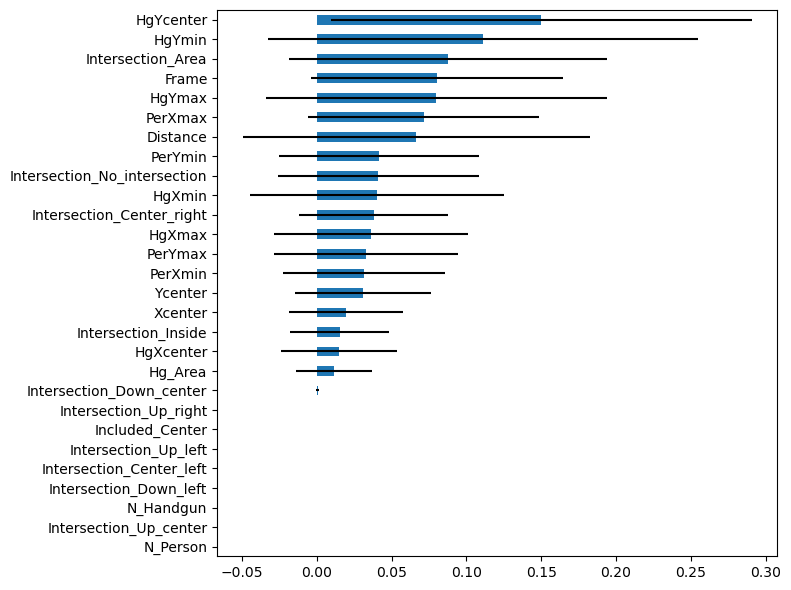

In [16]:
clf.fit(X_train.values, y_train.values)
predictions=clf.predict(X_test.values)
#Le agrego .values para solucionar el problema:
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
#https://stackoverflow.com/questions/69326639/sklearn-warning-valid-feature-names-in-version-1-0

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(figsize=(8,6),kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.62      0.72       208
           1       0.98      0.99      0.99      3482

    accuracy                           0.97      3690
   macro avg       0.92      0.81      0.85      3690
weighted avg       0.97      0.97      0.97      3690



In [17]:
# save the model to disk
filename = 'rfc_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

# Redes Neuronales - Todos los predictores

In [19]:
X = df3.drop('Ground_Truth',axis='columns')
y = df3.Ground_Truth

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18447 entries, 0 to 18446
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Frame                         18447 non-null  int64  
 1   N_Person                      18447 non-null  int64  
 2   Xcenter                       18447 non-null  float64
 3   Ycenter                       18447 non-null  float64
 4   PerXmin                       18447 non-null  float64
 5   PerYmin                       18447 non-null  float64
 6   PerXmax                       18447 non-null  float64
 7   PerYmax                       18447 non-null  float64
 8   N_Handgun                     18447 non-null  int64  
 9   HgXcenter                     18447 non-null  float64
 10  HgYcenter                     18447 non-null  float64
 11  HgXmin                        18447 non-null  float64
 12  HgYmin                        18447 non-null  float64
 13  H

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]
#X_scaled.shape

array([[-1.86956352, -1.00555701,  0.38531151, -1.05921327,  0.40701498,
        -0.80142004,  0.34796155, -1.43117415, -0.49785505,  0.64741793,
        -1.26000303,  0.70030692, -1.17819608,  0.59314201, -1.33715767,
         1.17746191, -0.05248719, -0.63178191, -0.69913501,  2.66619043,
        -0.28077575, -0.01803779, -0.010413  , -0.53994017, -1.08816856,
        -0.12003116, -0.06171798, -0.13265401],
       [-1.86739153, -1.00555701,  0.38502615, -1.05862322,  0.40603424,
        -0.79973294,  0.34840662, -1.43392466, -0.49785505,  0.64582561,
        -1.26085692,  0.69730991, -1.17884698,  0.59294144, -1.33821659,
         1.17746191, -0.05007777, -0.62590981, -0.69770697,  2.66619043,
        -0.28077575, -0.01803779, -0.010413  , -0.53994017, -1.08816856,
        -0.12003116, -0.06171798, -0.13265401],
       [-1.86521955, -1.00555701,  0.38564586, -1.06077595,  0.40750112,
        -0.80378268,  0.34812594, -1.4299105 , -0.49785505,  0.64564733,
        -1.26227066,  0.6972

In [22]:
print(scaler.mean_)

[8.60762292e+02 8.79655228e-01 3.93161312e+02 3.82498977e+02
 3.05759356e+02 2.46173151e+02 4.80563268e+02 5.18824803e+02
 2.99398276e-01 3.10692183e+02 3.12578882e+02 2.87292550e+02
 2.93009305e+02 3.34091816e+02 3.32148459e+02 4.19038326e-01
 9.32664492e+02 2.03117379e+03 2.32243763e+02 1.23326286e-01
 7.30742126e-02 3.25256139e-04 1.08418713e-04 2.25727761e-01
 5.42147775e-01 1.42028514e-02 3.79465496e-03 1.72927847e-02]


In [23]:
print(scaler.scale_)

[4.60408156e+02 8.74793987e-01 2.12394744e+02 6.88398006e+01
 2.20183283e+02 1.12014201e+02 2.12834959e+02 3.91717772e+01
 6.01376392e-01 1.53208307e+02 9.72465311e+01 1.52464326e+02
 9.92141547e+01 1.54444948e+02 9.58511636e+01 4.93401669e-01
 1.67163262e+03 1.81971903e+03 1.37488281e+02 3.28811364e-01
 2.60258280e-01 1.80319258e-02 1.04118662e-02 4.18060688e-01
 4.98220398e-01 1.18326372e-01 6.14837828e-02 1.30360057e-01]


In [24]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10) #stratify hace que el ratio entre 0 y 1 se mantenga en la distri. entre el test(y). 

In [25]:
X_train.shape

(13835, 28)

In [26]:
y_train.value_counts()

1    13070
0      765
Name: Ground_Truth, dtype: int64

In [27]:
X_test.shape

(4612, 28)

In [28]:
y_test.value_counts()

1    4357
0     255
Name: Ground_Truth, dtype: int64

In [29]:
from sklearn.neural_network import MLPClassifier
clf=MLPClassifier(hidden_layer_sizes=(25,25,25,25), max_iter=500, alpha=0.0001, solver='adam',
                 random_state=0, tol=0.000000001)
y_pred = clf.fit(X_train, y_train).predict(X_test)
predictions_mlp=clf.predict_proba(X_test)
predictions_mlp

array([[2.25239827e-11, 1.00000000e+00],
       [6.55758737e-01, 3.44241263e-01],
       [3.46611628e-13, 1.00000000e+00],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [6.47422185e-04, 9.99352578e-01]])

In [34]:
predictions_mlp=clf.predict(X_test)
predictions_mlp

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [35]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred)

array([[[4316,   41],
        [  24,  231]],

       [[ 231,   24],
        [  41, 4316]]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions_mlp))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       255
           1       0.99      0.99      0.99      4357

    accuracy                           0.99      4612
   macro avg       0.92      0.95      0.93      4612
weighted avg       0.99      0.99      0.99      4612



In [37]:
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9917600289121793
Score test =  0.985906331309627


In [30]:
# save the model to disk
filename = 'mlp_model_intersection.sav'
pickle.dump(clf, open(filename, 'wb')) 

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=0).fit(X_train, y_train)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

KeyboardInterrupt: 

In [28]:
# save the model to disk
filename = 'gradboost1.sav'
pickle.dump(clf, open(filename, 'wb'))

In [55]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=4)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Score train = ",clf.score(X_train, y_train))
print("Score test = ",clf.score(X_test, y_test))

Score train =  0.9746915533059158
Score test =  0.9544447959506486


In [56]:
from sklearn.metrics import multilabel_confusion_matrix
#rfc_o.fit(X_train.values, y_train.values)
multilabel_confusion_matrix(y_test, y_pred, labels=[0,1,2,3,4,5])

array([[[2613,   21],
        [   9,  518]],

       [[2583,   51],
        [  25,  502]],

       [[2614,   19],
        [  19,  509]],

       [[2621,   13],
        [  28,  499]],

       [[2593,   24],
        [  52,  492]],

       [[2637,   16],
        [  11,  497]]], dtype=int64)

In [35]:
# save the model to disk
filename = 'knn2.sav'
pickle.dump(neigh, open(filename, 'wb'))